# Training and Testing the Random Forest (RF) Classifier

In this notebook I found a baseline accuracy for my model, trained my RF classifer, and then tested it. 

## Importing Modules

Farrukh notes: baseline is 33% accuracy. CLass imbalance? If there is, fix for that. Use all the features. Let algorithm take care of that. Use PCA. Remember to show how many features to pick and how you did that. Add a note that these features are not really the features that we see, but different dimensions. Add a sentence that explains how they show how to do it. 

First establish baseline
See what measure of accuracy you want to use? Accuracy by itself? Prescision, recall, F1... all depends on how the data is skewed
Show improvement from the baseline, how much improvement am I seeing? Mention I've split test and train. 
My first algorithm is x accuracte. Wtih more time etc. we can improve more with x, y ,z. 

In [27]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the train features and labels

In [28]:
train_features = np.loadtxt('train_features.txt', dtype=int)

In [29]:
train_labels = np.loadtxt('train_labels.txt', dtype=int)

In [32]:
test_features = np.loadtxt('test_features.txt', dtype=int)

In [33]:
test_labels = np.loadtxt('test_labels.txt', dtype=int)

In [96]:
feature_list = np.loadtxt('feature_list.txt', dtype=str)

## Establishing a baseline accuracy with a random prediction model

In [79]:
baseline_preds = []
for i in np.arange(len(test_labels)):
    pred = np.random.choice(train_labels)
    baseline_preds.append(pred)

I picked random labels from my train_labels set in order to establish the baseline accuracy for the algorithm. Since I'm chosing the labels from the train_labels set, the labels that appear more often will also appear more often in the baseline prediction set. This will account for the class imbalance. 

In [81]:
accurate = 0
for a, b in zip(baseline_preds, test_labels):
    if a == b:
        accurate += 1
print('Baseline accuracy: ', round(accurate/len(test_labels), 3)* 100, '%')

Baseline accuracy:  61.8 %


## Training the RF Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, random_state=123, verbose = True, n_estimators=1000)
rf = clf.fit(train_features, train_labels)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.6min finished


## Testing the RF Classifier

In [86]:
rf_preds = clf.predict(test_features)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   10.9s finished


In [88]:
accurate = 0
for a, b in zip(rf_preds, test_labels):
    if a == b:
        accurate += 1
print('Random Forest Classifier Accuracy: ', round(accurate/len(test_labels), 3)* 100, '%')

Random Forest Classifier Accuracy:  94.8 %


There was an improvment from 61.9 % accuracy in random predictions to 94.8% accuracy with the RF classifier. That's an improvement of nearly 33 points.

In [90]:
pd.crosstab(test_labels, rf_preds, rownames=['True Recommendations'], colnames=['Predicted Recommendations'])

Predicted Recommendations,-1,0,1
True Recommendations,,,
-1,49773,49,200
0,435,4123,430
1,1747,550,8146


In [132]:
from sklearn.metrics import confusion_matrix
import itertools

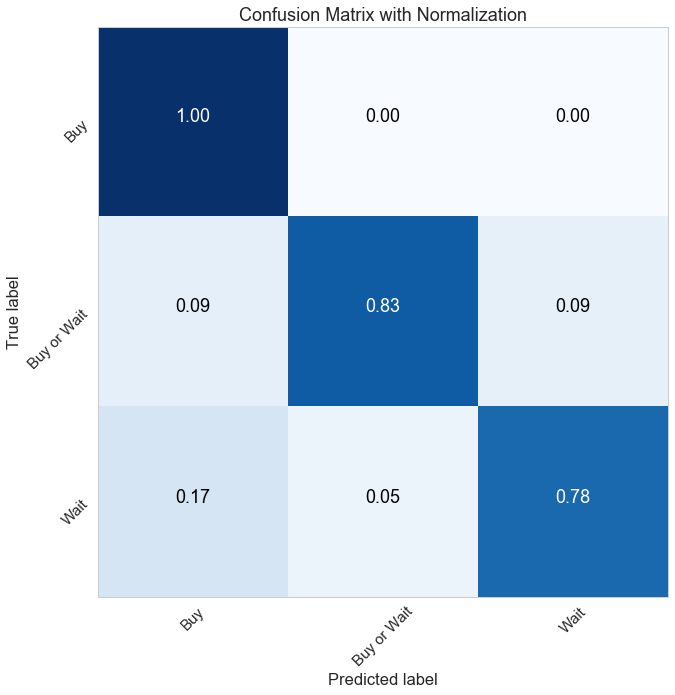

In [167]:
sns.set_style("whitegrid")
classes = ['Buy', 'Buy or Wait', 'Wait']
cmap=plt.cm.Blues
cnf_matrix = confusion_matrix(test_labels, rf_preds)
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
tick_marks = np.arange(len(classes))
_ = plt.figure(figsize = (10,10))
_ = plt.imshow(cnf_matrix, cmap = cmap)
_ = plt.title("Confusion Matrix with Normalization")
_ = plt.xticks(tick_marks, classes, rotation = 45)
_ = plt.yticks(tick_marks, classes, rotation = 45)
_ = plt.ylabel('True label')
_ = plt.xlabel('Predicted label')
_ = plt.grid('off')
_ = plt.tight_layout()
fmt = '.2f'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center", color="white" if cnf_matrix[i, j] > thresh else "black")

Above is a confusion matrix of my results.  

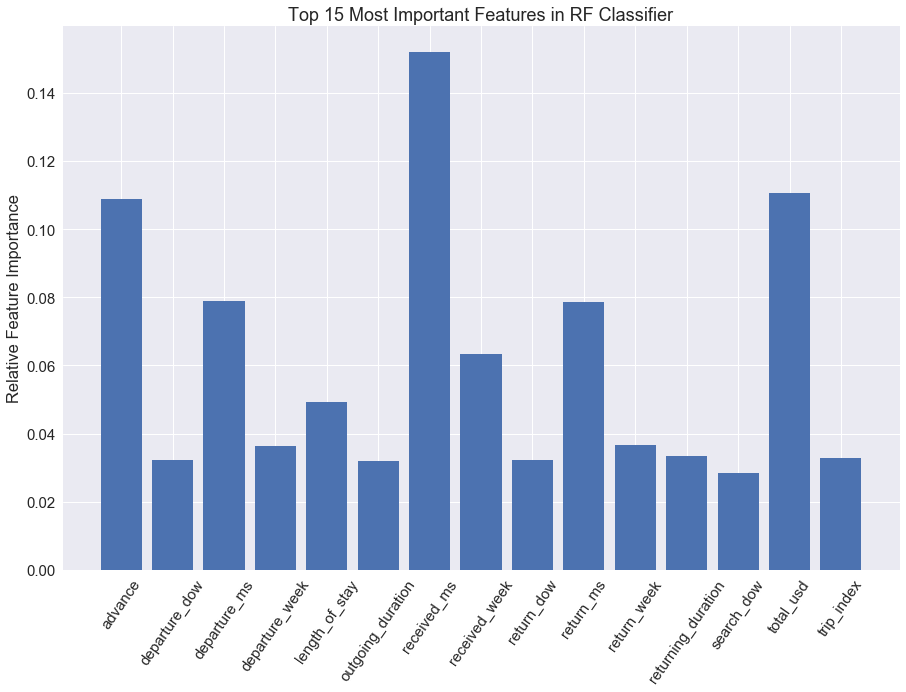

In [123]:
f_i = list(zip(feature_list, clf.feature_importances_))
feature_importances = pd.DataFrame(f_i, columns =['features', 'importances']).sort_values('importances', ascending = False)
top15 = feature_importances.iloc[:15,:]

sns.set(font_scale = 1.5)
_ = plt.figure(figsize = (15,10))
_ = plt.bar(top15['features'], top15['importances'])
_ = plt.title("Top 15 Most Important Features in RF Classifier")
_ = plt.ylabel("Relative Feature Importance")
_ = plt.xticks(rotation=55)

In [106]:
accurate = 0
for a, b in zip(rf_preds, test_labels):
    if a == 0:
        a = a + 1
    if b == 0:
        b = b + 1
    if a == b:
        accurate += 1
print('Random Forest Classifier Accuracy: ', round(accurate/len(test_labels), 3)* 100, '%')

Random Forest Classifier Accuracy:  96.3 %


In the cell above I changed all of the category of "Buy or Wait" to entirely buy. This would result in the same amount of money being saved for the customer. My accuracy improves by 1.5 points.